In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/bank-additional-names.txt
/kaggle/input/bank-marketing/bank-additional-full.csv


In [2]:
df = pd.read_csv(r'/kaggle/input/bank-marketing/bank-additional-full.csv',sep=';')

In [3]:
df['y'] = df.y.map(dict(yes=1, no=0))

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [5]:
pip install gamma-facet

     |████████████████████████████████| 68 kB 615 kB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 89 kB 2.0 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
from numpy import interp
import matplotlib.pylab as plt

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    auc,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    precision_recall_curve,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay,
)
from sklearn.compose import make_column_selector
from sklearn.model_selection import RepeatedKFold

In [7]:
from facet.data import Sample
from facet.selection import LearnerRanker, LearnerGrid
from facet.crossfit import LearnerCrossfit

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
churn_df = df


# create sample object
churn_sample = Sample(
    observations=churn_df,
    feature_names=churn_df.drop(columns=["y"]).columns,
    target_name="y",
)

# check target name
churn_sample.target_name

'y'

In [10]:
pip install sklearndf

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.compose import make_column_selector
from sklearndf.transformation import ColumnTransformerDF
from sklearndf.transformation import SimpleImputerDF
from sklearndf.transformation import OneHotEncoderDF
from sklearndf.pipeline import PipelineDF


from sklearndf.pipeline import PipelineDF, ClassifierPipelineDF
from sklearndf.classification import RandomForestClassifierDF
from sklearndf.transformation import (
    ColumnTransformerDF,
    OneHotEncoderDF,
    SimpleImputerDF,
)
from sklearndf.transformation.extra import BorutaDF

In [12]:
preprocessing_categorical = PipelineDF(
    steps = [
            ("imputer", SimpleImputerDF(strategy="most_frequent",fill_value="<na>")),
            ("one-hot",OneHotEncoderDF(sparse=False, handle_unknown="ignore")),
    ]
)

preprocessing_numerical = SimpleImputerDF(strategy="median")

In [13]:
preprocessing_features = ColumnTransformerDF(
    transformers = [
                    (
                        "categorcial",
                     preprocessing_categorical,
                     make_column_selector(dtype_include="object")
                    ),
                    (
                        "numerical",
                     preprocessing_numerical,
                     make_column_selector(dtype_include=np.number),
                    ),
    ]
)

In [14]:
boruta_feature_selection = PipelineDF(
    steps=[
        ("preprocessing", preprocessing_features),
        (
            "boruta",
            BorutaDF(
                estimator=RandomForestClassifierDF(
                    max_depth=5, n_jobs=-3, random_state=42
                ),
                n_estimators="auto",
                random_state=42,
                verbose=False,
            ),
        ),
    ]
)

# run feature selection using Boruta and report those selected
boruta_feature_selection.fit(X=churn_sample.features, y=churn_sample.target)
selected = boruta_feature_selection.feature_names_original_.unique()
selected

array(['job', 'default', 'contact', 'month', 'poutcome', 'age',
       'duration', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype=object)

In [15]:
churn_sample_kept_features = churn_sample.keep(feature_names=selected)

In [16]:
rforest_clf = ClassifierPipelineDF(
    preprocessing=preprocessing_features,
    classifier = RandomForestClassifierDF(random_state=42)
)

In [17]:

classifier_grid = [
                   LearnerGrid(
                       pipeline = rforest_clf,
                       learner_parameters={"max_depth": [4, 8], "n_estimators": [200,500]},
                   )
]

In [18]:
clf_ranker = LearnerRanker(
    grids=classifier_grid,
    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42),
    n_jobs=-3,
    scoring="roc_auc").fit(churn_sample_kept_features)

In [19]:

clf_ranker.summary_report()

ranking_score   roc_auc                          classifier               \
                        mean       std                      type n_estimators   
rank                                                                            
0         0.933712  0.940014  0.003151  RandomForestClassifierDF          500   
1         0.933708  0.939933  0.003113  RandomForestClassifierDF          200   
2         0.917842  0.925968  0.004063  RandomForestClassifierDF          200   
3         0.915632  0.923782  0.004075  RandomForestClassifierDF          500   

                
     max_depth  
rank            
0            8  
1            8  
2            4  
3            4

In [20]:
y_pred = clf_ranker.best_model_.predict(churn_sample_kept_features.features)
y_prob = clf_ranker.best_model_.predict_proba(churn_sample_kept_features.features)[1]
y_true = churn_sample_kept_features.target

In [21]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     36548
           1       0.81      0.34      0.48      4640

    accuracy                           0.92     41188
   macro avg       0.87      0.66      0.72     41188
weighted avg       0.91      0.92      0.90     41188



In [22]:
prec, recall,s = precision_recall_curve(y_true, y_prob, pos_label=1)

Text(0.5, 1.0, 'Summary of model performance')

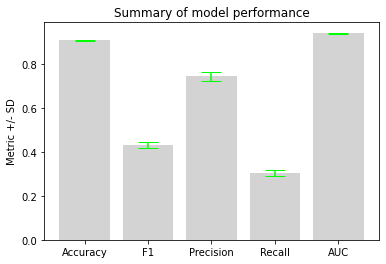

In [23]:
metrics = []

# use established crossfit which contains all splits and fitted models
best_crossfit = clf_ranker.best_model_crossfit_
for (train_index, test_index), model in zip(best_crossfit.splits(), best_crossfit.models()):
    
    # get required target outputs
    y_true = churn_sample_kept_features.target[test_index]
    y_prob = model.predict_proba(churn_sample_kept_features.features.iloc[test_index])[1]
    y_pred = model.predict(churn_sample_kept_features.features.iloc[test_index])
    
    # calculate metrics
    metrics.append(pd.Series({
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'AUC': roc_auc_score(y_true, y_prob)}))
                   
# collect required summaries and plot
metrics_df = pd.DataFrame(metrics)
fig, ax = plt.subplots()
ax.bar(
    metrics_df.columns,
    metrics_df.mean(),
    yerr=metrics_df.std(),
    align='center',
    ecolor='lime',
    capsize=10,
    color='lightgrey'
)
ax.set_ylabel('Metric +/- SD')
ax.set_title('Summary of model performance')